In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist# база выборок
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
N = 5

x1 = np.random.random(N)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)]
C1 = [x1,x2]

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1
C2 = [x1,x2]

f = [0,1]

w = np.array([-0.3,0.3])
for i in range(N):
    x = np.array([C2[0][i], C2[1][i]])
    y = np.dot(w,x)
    if y >= 0:
         print("Class C1")
    else:
         print("Class C2")

plt.scatter(C1[0][:], C1[1][:], s=10, c='red')
plt.scatter(C2[0][:], C2[1][:], s=10, c='blue')
plt.plot(f)
plt.grid(True)
plt.show()

In [ ]:
def f(x):
    return 2/(1 + np.exp(-x)) - 1
def df(x):
    return 0.5*(1+x)*(1-x)

W1 = np.array([[-0.3, 0.1,0.4],
               [-0.1,0.5,-0.4]])
W2 = np.array([0.1,-0.4])

def go_forward(inp):
    sum = np.dot(W1, inp)
    out = np.array([f(x) for x in sum])

    sum = np.dot(W2, out)
    y = f(sum)
    return (y, out)

def train(epoch):
    global W2, W1
    lmd = 0.01
    N = 10000
    count = len(epoch)
    for k in range(N):
        x = epoch[np.random.randint(0, count)]
        y, out = go_forward(x[0:3])
        e = y - x[-1]
        delta = e*df(y)
        W2[0] = W2[0] - lmd * delta * out[0]
        W2[1] = W2[1] - lmd * delta * out[1]
        
        delta2 = W2*delta*df(out)

        W1[0, :] = W1[0, :] - np.array(x[0:3]) * delta2[0] * lmd
        W1[1, :] = W1[1, :] - np.array(x[0:3]) * delta2[1] * lmd

epoch = [(-1, -1, -1, -1),
         (-1, -1, 1, 1),
         (-1, 1, -1, -1),
         (-1, 1, 1, 1),
         (1, -1, -1, -1),
         (1, -1, 1, 1),
         (1, 1, -1, -1),
         (1, 1, 1, 1)]

train(epoch)

for x in epoch:
    y, out = go_forward(x[0:3])
    print(f"Выходное значение НС: {y} => {x[-1]}")

In [ ]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

model = keras.Sequential()#Sequential — класс библиотеки Keras, который позволяет создавать нейронные сети послойно в линейном стеке
model.add(Dense(units=1, input_shape=(1,), activation='linear'))#полносвязный слой в нейронных сетях машинного обучения, где каждый нейрон связан со всеми нейронами предыдущего слоя

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))#это команда для компиляции модели в библиотеке Keras, которая указывает критерий качества (минимум среднего квадрата ошибки) и способ оптимизации алгоритма градиентного спуска — оптимизацию по Adam. 

history = model.fit(c, f, epochs=500, verbose=0)#Метод fit возвращает объект, который содержит информацию об изменении потерь с каждой последующей итерацией
print("Обучение завершено")

plt.plot(history.history['loss'])#атрибут объекта History в Keras, который содержит значения потерь для обучения и проверки 
plt.grid(True)
plt.show()

print(model.predict(np.array([100])))#Он позволяет прогнозировать значения на основе обученной модели
print(model.get_weights())#метод, который возвращает список текущих весов слоя в виде массивов Numpy

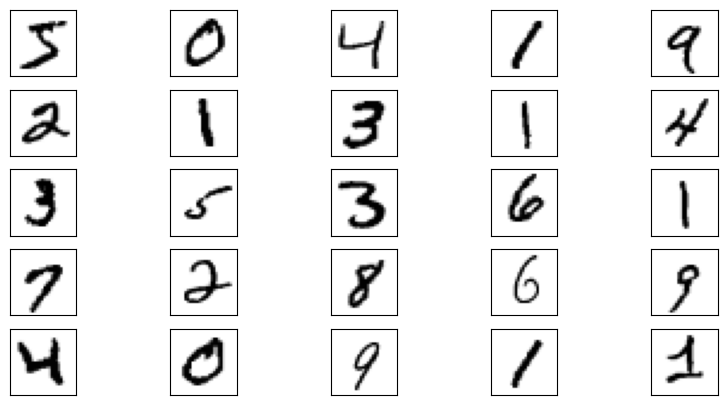

c:\Users\pasha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9192 - loss: 0.2814 - val_accuracy: 0.9564 - val_loss: 0.1546
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9642 - loss: 0.1230 - val_accuracy: 0.9678 - val_loss: 0.1087
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9752 - loss: 0.0848 - val_accuracy: 0.9682 - val_loss: 0.1033
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9802 - loss: 0.0645 - val_accuracy: 0.9722 - val_loss: 0.0897
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9852 - loss: 0.0488 - val_accuracy: 0.9744 - val_loss: 0.0865
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.9761 - loss: 0.0799
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[9.5119823e-10 1.6781197e-04 9.9982411e-01 4.7782296e-06 4.7368154e-17
  2.8317013e-08 2.6369233e-09 1.9309799e-11 3.3408003e-06 8.9959821e-13]]
2


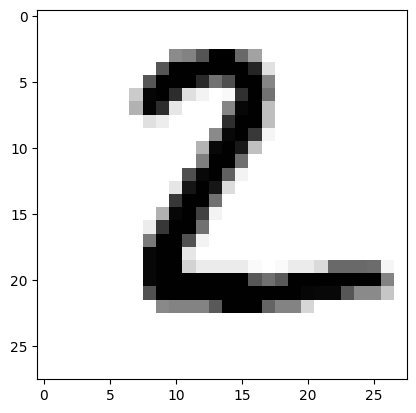

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True  True  True]
(239, 28, 28)


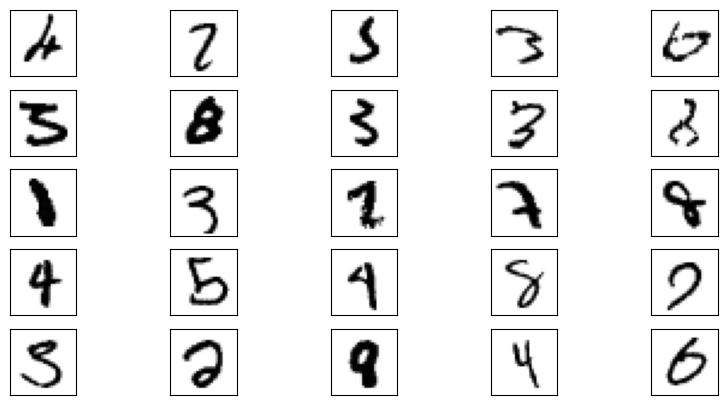

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
#Стандартизация
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

#Отображение первых 25 изображение из выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=(plt.cm.binary))

plt.show()

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()
